### Hands on practice 3

In [ ]:
!pip install pytz

## Dataset 1: Sales Transactions Analysis

=== SALES TRANSACTIONS ANALYSIS ===

1. DATA EXPLORATION
Dataset Shape: (10, 6)
Date Range: 2023-01-01 00:00:00 to 2023-01-10 00:00:00

First 5 rows:
        Date  Customer_ID Region Product  Units_Sold  Sales_Amount
0 2023-01-01          101  North       A       100.0          1000
1 2023-01-02          102   East       B       150.0          1200
2 2023-01-03          103   West       C         NaN           950
3 2023-01-04          104  South       A       200.0          2000
4 2023-01-05          105  North       C       300.0          3300

Data Types:
Date            datetime64[ns]
Customer_ID              int64
Region                  object
Product                 object
Units_Sold             float64
Sales_Amount             int64
dtype: object

Summary Statistics:
                      Date  Customer_ID  Units_Sold  Sales_Amount
count                   10     10.00000    8.000000     10.000000
mean   2023-01-05 12:00:00    105.50000  275.000000   2265.000000
min    2023-01-0

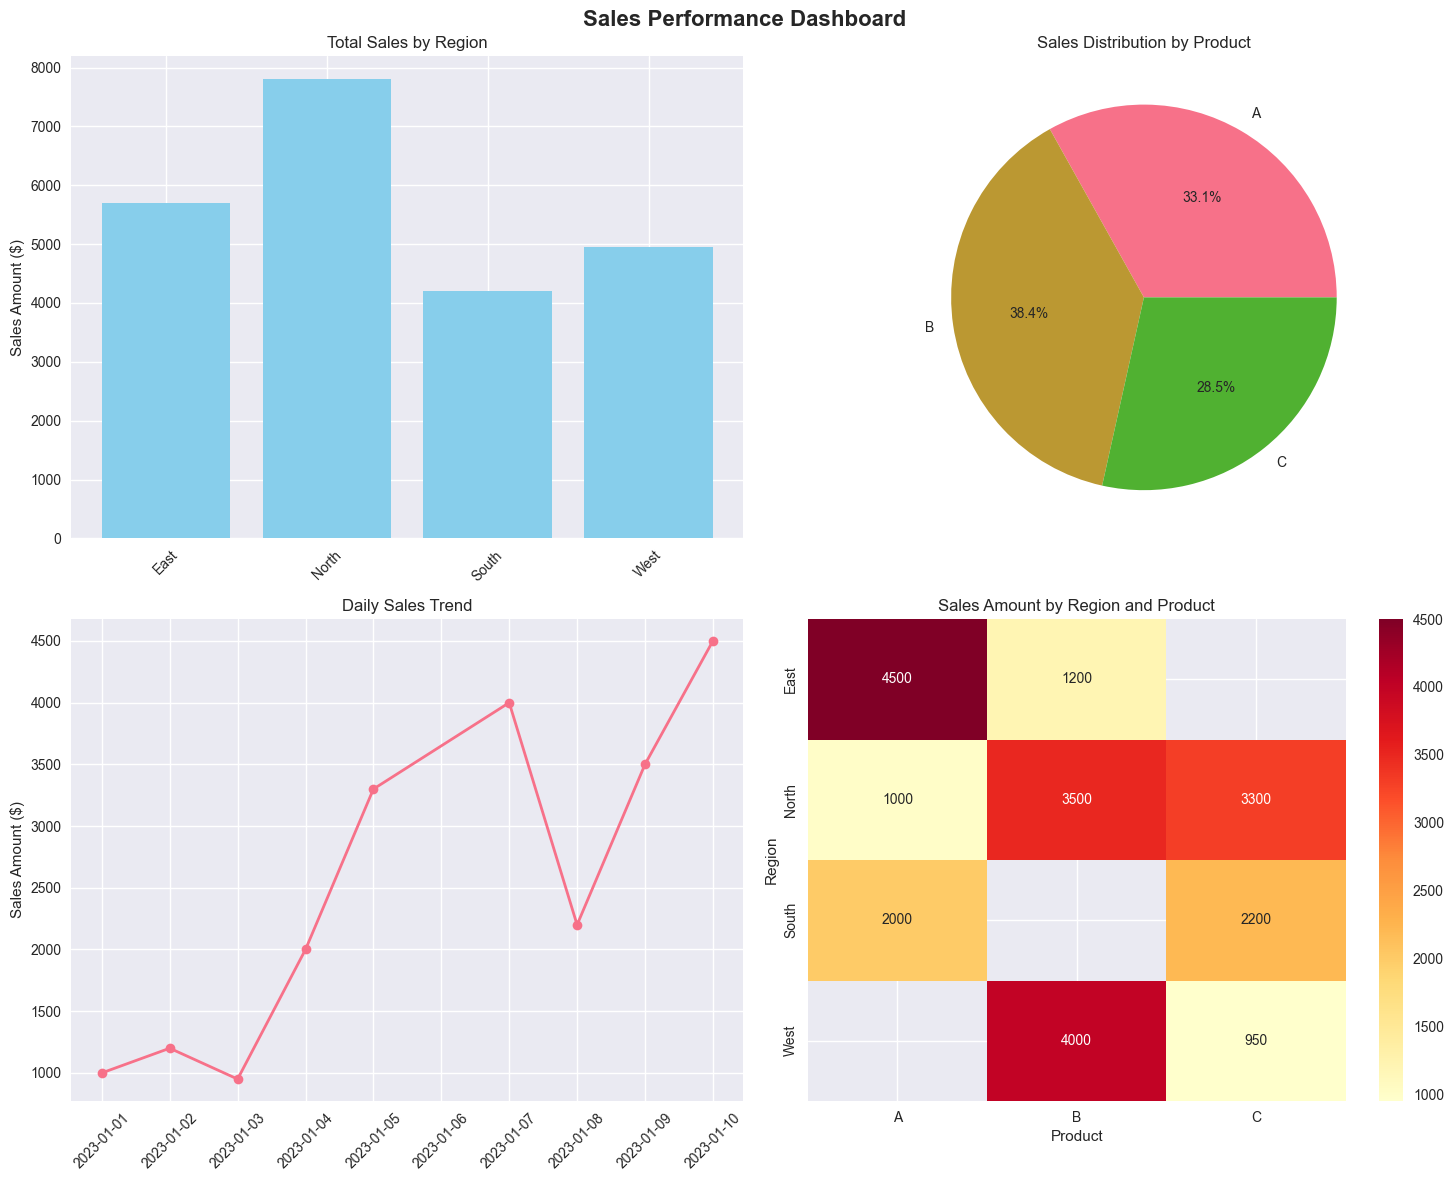


5. KEY BUSINESS INSIGHTS:
• Total Sales: $22,650.00
• Average Transaction Value: $2,516.67
• Best Performing Region: North ($7,800.00)
• Best Selling Product: B ($8,700.00)
• Data Quality: Fixed 2 missing units and 1 zero-sales records


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set up visualization style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Load Dataset 1 - Sales Transactions
def analyze_sales_data():
    print("=== SALES TRANSACTIONS ANALYSIS ===")
    
    # Create the DataFrame
    sales_data = pd.DataFrame({
        'Date': ['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05', 
                '2023-01-06', '2023-01-07', '2023-01-08', '2023-01-09', '2023-01-10'],
        'Customer_ID': [101, 102, 103, 104, 105, 106, 107, 108, 109, 110],
        'Region': ['North', 'East', 'West', 'South', 'North', 'East', 'West', 'South', 'North', 'East'],
        'Product': ['A', 'B', 'C', 'A', 'C', 'A', 'B', 'C', 'B', 'A'],
        'Units_Sold': [100.0, 150.0, np.nan, 200.0, 300.0, np.nan, 400.0, 250.0, 350.0, 450.0],
        'Sales_Amount': [1000, 1200, 950, 2000, 3300, 0, 4000, 2200, 3500, 4500]
    })
    
    # Convert Date to datetime
    sales_data['Date'] = pd.to_datetime(sales_data['Date'])
    
    # 1. DATA EXPLORATION
    print("\n1. DATA EXPLORATION")
    print(f"Dataset Shape: {sales_data.shape}")
    print(f"Date Range: {sales_data['Date'].min()} to {sales_data['Date'].max()}")
    print("\nFirst 5 rows:")
    print(sales_data.head())
    
    print("\nData Types:")
    print(sales_data.dtypes)
    
    print("\nSummary Statistics:")
    print(sales_data.describe())
    
    print("\nMissing Values:")
    print(sales_data.isnull().sum())
    
    # 2. DATA CLEANING
    print("\n2. DATA CLEANING")
    # Handle missing values in Units_Sold
    sales_data_clean = sales_data.copy()
    sales_data_clean['Units_Sold'] = sales_data_clean['Units_Sold'].fillna(sales_data_clean['Units_Sold'].median())
    
    # Remove records with 0 Sales_Amount (likely data errors)
    sales_data_clean = sales_data_clean[sales_data_clean['Sales_Amount'] > 0]
    
    # Calculate unit price for analysis
    sales_data_clean['Unit_Price'] = sales_data_clean['Sales_Amount'] / sales_data_clean['Units_Sold']
    
    print("Data after cleaning:")
    print(f"Remaining records: {len(sales_data_clean)}")
    print(sales_data_clean.head())
    
    # 3. BUSINESS ANALYSIS & AGGREGATION
    print("\n3. BUSINESS INSIGHTS")
    
    # 3.1 Sales by Region
    print("\n3.1 Sales Performance by Region:")
    region_sales = sales_data_clean.groupby('Region').agg({
        'Sales_Amount': ['sum', 'mean', 'count'],
        'Units_Sold': 'sum'
    }).round(2)
    print(region_sales)
    
    # 3.2 Product Performance
    print("\n3.2 Product Performance Analysis:")
    product_performance = sales_data_clean.groupby('Product').agg({
        'Sales_Amount': ['sum', 'mean', 'count'],
        'Units_Sold': 'sum',
        'Unit_Price': 'mean'
    }).round(2)
    print(product_performance)
    
    # 3.3 Daily Sales Trend
    print("\n3.3 Daily Sales Trend:")
    daily_sales = sales_data_clean.groupby('Date').agg({
        'Sales_Amount': 'sum',
        'Units_Sold': 'sum'
    })
    print(daily_sales)
    
    # 3.4 Cross-tabulation: Region vs Product
    print("\n3.4 Region-Product Matrix (Units Sold):")
    region_product_ct = pd.crosstab(
        index=sales_data_clean['Region'],
        columns=sales_data_clean['Product'],
        values=sales_data_clean['Units_Sold'],
        aggfunc='sum',
        margins=True
    )
    print(region_product_ct)
    
    # 4. DATA VISUALIZATION
    print("\n4. CREATING VISUALIZATIONS...")
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Sales Performance Dashboard', fontsize=16, fontweight='bold')
    
    # 4.1 Sales by Region
    region_totals = sales_data_clean.groupby('Region')['Sales_Amount'].sum()
    axes[0,0].bar(region_totals.index, region_totals.values, color='skyblue')
    axes[0,0].set_title('Total Sales by Region')
    axes[0,0].set_ylabel('Sales Amount ($)')
    axes[0,0].tick_params(axis='x', rotation=45)
    
    # 4.2 Product Performance
    product_totals = sales_data_clean.groupby('Product')['Sales_Amount'].sum()
    axes[0,1].pie(product_totals.values, labels=product_totals.index, autopct='%1.1f%%')
    axes[0,1].set_title('Sales Distribution by Product')
    
    # 4.3 Daily Sales Trend
    axes[1,0].plot(daily_sales.index, daily_sales['Sales_Amount'], marker='o', linewidth=2)
    axes[1,0].set_title('Daily Sales Trend')
    axes[1,0].set_ylabel('Sales Amount ($)')
    axes[1,0].tick_params(axis='x', rotation=45)
    
    # 4.4 Region-Product Heatmap
    heatmap_data = pd.crosstab(
        index=sales_data_clean['Region'],
        columns=sales_data_clean['Product'],
        values=sales_data_clean['Sales_Amount'],
        aggfunc='sum'
    )
    sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='YlOrRd', ax=axes[1,1])
    axes[1,1].set_title('Sales Amount by Region and Product')
    
    plt.tight_layout()
    plt.show()
    
    # 5. KEY BUSINESS INSIGHTS
    print("\n5. KEY BUSINESS INSIGHTS:")
    print(f"• Total Sales: ${sales_data_clean['Sales_Amount'].sum():,.2f}")
    print(f"• Average Transaction Value: ${sales_data_clean['Sales_Amount'].mean():,.2f}")
    print(f"• Best Performing Region: {region_totals.idxmax()} (${region_totals.max():,.2f})")
    print(f"• Best Selling Product: {product_totals.idxmax()} (${product_totals.max():,.2f})")
    print(f"• Data Quality: Fixed {sales_data['Units_Sold'].isnull().sum()} missing units and {len(sales_data[sales_data['Sales_Amount'] == 0])} zero-sales records")
    
    return sales_data_clean

# Execute sales analysis
cleaned_sales = analyze_sales_data()

## Dataset 2: Customer Demographics Analysis


=== CUSTOMER DEMOGRAPHICS ANALYSIS ===

1. DATA EXPLORATION
Dataset Shape: (10, 5)
Unique Customers: 10

First 5 rows:
   Customer_ID Customer_Name  Gender  Annual_Income Loyalty_Program
0          101          John    Male          55000             Yes
1          102         Alice  Female          65000              No
2          103           Bob    Male          48000             Yes
3          104           Eve  Female          72000             Yes
4          105       Charlie    Male          59000              No

Data Types:
Customer_ID         int64
Customer_Name      object
Gender             object
Annual_Income       int64
Loyalty_Program    object
dtype: object

Summary Statistics:
       Customer_ID  Annual_Income
count     10.00000      10.000000
mean     105.50000   60500.000000
std        3.02765   10803.805914
min      101.00000   47000.000000
25%      103.25000   52000.000000
50%      105.50000   59500.000000
75%      107.75000   67250.000000
max      110.00000   8

C:\Users\seong\AppData\Local\Temp\ipykernel_17456\2515307909.py:65: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_analysis = customer_data.groupby('Income_Segment').agg({


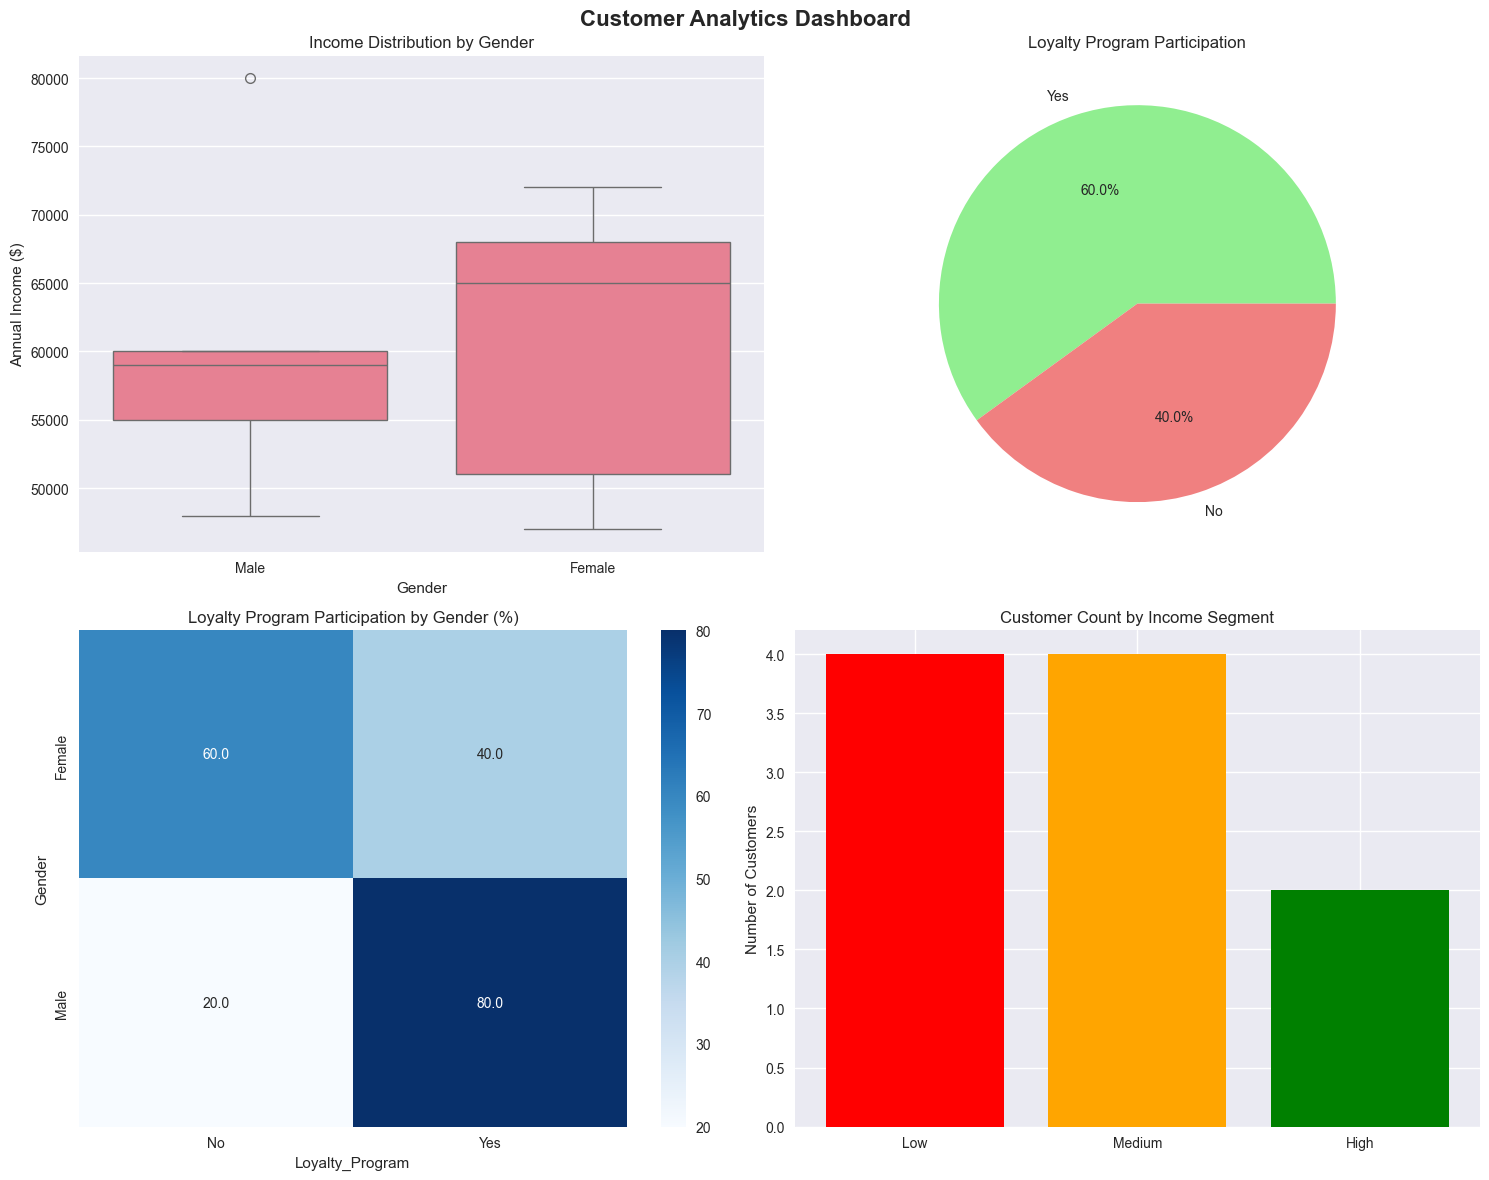


4. KEY CUSTOMER INSIGHTS:
• Total Customers: 10
• Average Annual Income: $60,500.00
• Loyalty Program Penetration: 60.0%
• Gender Distribution: {'Male': 5, 'Female': 5}
• High-Value Customers (Income >$70K): 2


In [2]:
def analyze_customer_data():
    print("\n" + "="*50)
    print("=== CUSTOMER DEMOGRAPHICS ANALYSIS ===")
    
    # Create the DataFrame
    customer_data = pd.DataFrame({
        'Customer_ID': [101, 102, 103, 104, 105, 106, 107, 108, 109, 110],
        'Customer_Name': ['John', 'Alice', 'Bob', 'Eve', 'Charlie', 'David', 'Grace', 'Heidi', 'Ivan', 'Judy'],
        'Gender': ['Male', 'Female', 'Male', 'Female', 'Male', 'Male', 'Female', 'Female', 'Male', 'Female'],
        'Annual_Income': [55000, 65000, 48000, 72000, 59000, 80000, 47000, 51000, 60000, 68000],
        'Loyalty_Program': ['Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No']
    })
    
    # 1. DATA EXPLORATION
    print("\n1. DATA EXPLORATION")
    print(f"Dataset Shape: {customer_data.shape}")
    print(f"Unique Customers: {customer_data['Customer_ID'].nunique()}")
    
    print("\nFirst 5 rows:")
    print(customer_data.head())
    
    print("\nData Types:")
    print(customer_data.dtypes)
    
    print("\nSummary Statistics:")
    print(customer_data.describe())
    
    # 2. CUSTOMER SEGMENTATION ANALYSIS
    print("\n2. CUSTOMER SEGMENTATION ANALYSIS")
    
    # 2.1 Demographics Overview
    print("\n2.1 Customer Demographics:")
    demo_summary = customer_data.groupby('Gender').agg({
        'Customer_ID': 'count',
        'Annual_Income': ['mean', 'median', 'std']
    }).round(2)
    print(demo_summary)
    
    # 2.2 Loyalty Program Analysis
    print("\n2.2 Loyalty Program Performance:")
    loyalty_analysis = customer_data.groupby('Loyalty_Program').agg({
        'Customer_ID': 'count',
        'Annual_Income': ['mean', 'median']
    }).round(2)
    print(loyalty_analysis)
    
    # 2.3 Cross-tabulation: Gender vs Loyalty Program
    print("\n2.3 Gender and Loyalty Program Distribution:")
    gender_loyalty_ct = pd.crosstab(
        index=customer_data['Gender'],
        columns=customer_data['Loyalty_Program'],
        margins=True,
        margins_name='Total'
    )
    print(gender_loyalty_ct)
    
    # 2.4 Income Segmentation
    print("\n2.4 Income Segmentation:")
    customer_data['Income_Segment'] = pd.cut(
        customer_data['Annual_Income'],
        bins=[40000, 55000, 70000, 85000],
        labels=['Low', 'Medium', 'High']
    )
    
    segment_analysis = customer_data.groupby('Income_Segment').agg({
        'Customer_ID': 'count',
        'Annual_Income': 'mean',
        'Loyalty_Program': lambda x: (x == 'Yes').mean() * 100  # Loyalty participation rate
    }).round(2)
    print(segment_analysis.rename(columns={'Customer_ID': 'Count', 'Loyalty_Program': 'Loyalty_Rate(%)'}))
    
    # 3. DATA VISUALIZATION
    print("\n3. CREATING CUSTOMER VISUALIZATIONS...")
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Customer Analytics Dashboard', fontsize=16, fontweight='bold')
    
    # 3.1 Income Distribution by Gender
    sns.boxplot(data=customer_data, x='Gender', y='Annual_Income', ax=axes[0,0])
    axes[0,0].set_title('Income Distribution by Gender')
    axes[0,0].set_ylabel('Annual Income ($)')
    
    # 3.2 Loyalty Program Participation
    loyalty_counts = customer_data['Loyalty_Program'].value_counts()
    axes[0,1].pie(loyalty_counts.values, labels=loyalty_counts.index, autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
    axes[0,1].set_title('Loyalty Program Participation')
    
    # 3.3 Gender-Loyalty Heatmap
    heatmap_data = pd.crosstab(
        index=customer_data['Gender'],
        columns=customer_data['Loyalty_Program'],
        normalize='index'  # Shows percentages by row
    ) * 100
    sns.heatmap(heatmap_data, annot=True, fmt='.1f', cmap='Blues', ax=axes[1,0])
    axes[1,0].set_title('Loyalty Program Participation by Gender (%)')
    
    # 3.4 Income Segments
    segment_counts = customer_data['Income_Segment'].value_counts()
    axes[1,1].bar(segment_counts.index, segment_counts.values, color=['red', 'orange', 'green'])
    axes[1,1].set_title('Customer Count by Income Segment')
    axes[1,1].set_ylabel('Number of Customers')
    
    plt.tight_layout()
    plt.show()
    
    # 4. KEY CUSTOMER INSIGHTS
    print("\n4. KEY CUSTOMER INSIGHTS:")
    print(f"• Total Customers: {len(customer_data)}")
    print(f"• Average Annual Income: ${customer_data['Annual_Income'].mean():,.2f}")
    print(f"• Loyalty Program Penetration: {(customer_data['Loyalty_Program'] == 'Yes').mean() * 100:.1f}%")
    print(f"• Gender Distribution: {customer_data['Gender'].value_counts().to_dict()}")
    print(f"• High-Value Customers (Income >$70K): {len(customer_data[customer_data['Annual_Income'] > 70000])}")
    
    return customer_data

# Execute customer analysis
cleaned_customers = analyze_customer_data()

## Combined Analysis: Customer-Sales Integration


=== INTEGRATED CUSTOMER & SALES ANALYSIS ===
Merged dataset shape: (9, 12)

First 3 rows of merged data:
        Date  Customer_ID Region Product  Units_Sold  Sales_Amount  \
0 2023-01-01          101  North       A       100.0          1000   
1 2023-01-02          102   East       B       150.0          1200   
2 2023-01-03          103   West       C       275.0           950   

   Unit_Price Customer_Name  Gender  Annual_Income Loyalty_Program  \
0   10.000000          John    Male          55000             Yes   
1    8.000000         Alice  Female          65000              No   
2    3.454545           Bob    Male          48000             Yes   

  Income_Segment  
0            Low  
1         Medium  
2            Low  

1. SALES BY CUSTOMER DEMOGRAPHICS

Sales Performance by Gender:
       Sales_Amount               Units_Sold
                sum    mean count        sum
Gender                                      
Female        13900  2780.0     5     1450.0
Male       

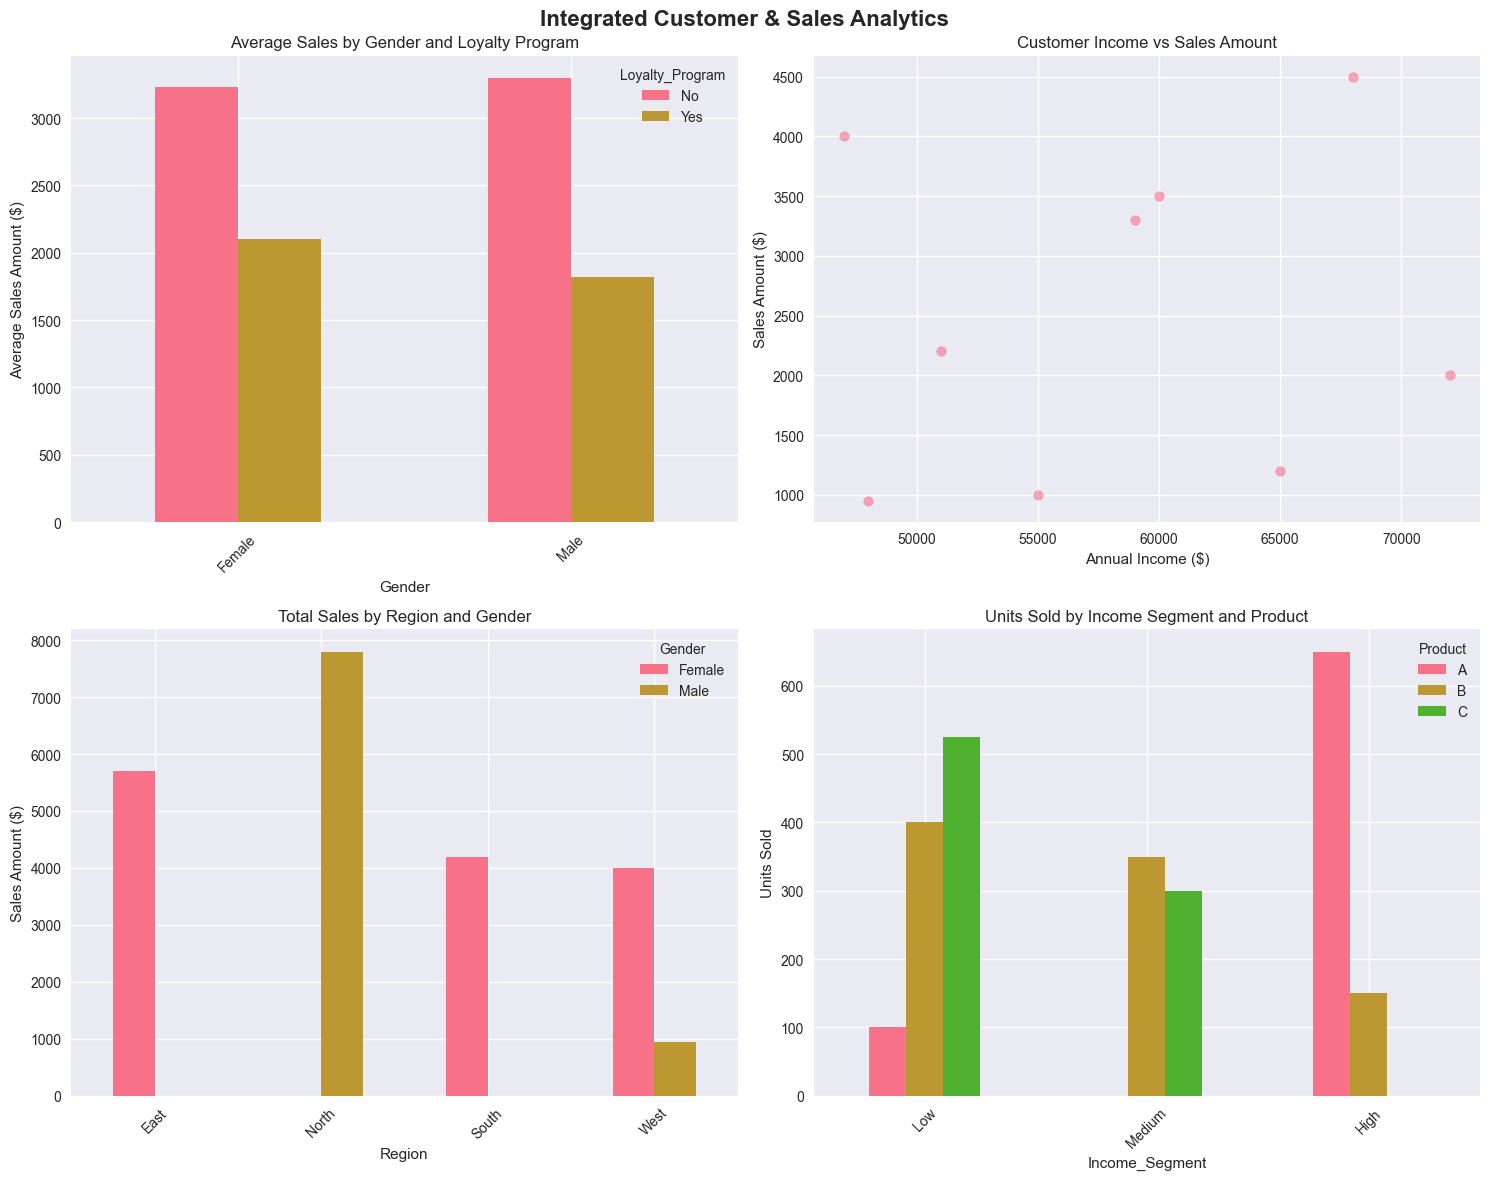


4. STRATEGIC RECOMMENDATIONS:
• Focus loyalty program marketing on high-income segments
• Analyze regional gender preferences for targeted campaigns
• Develop product bundles based on income segment preferences
• Use customer demographics to personalize sales approaches

ANALYSIS COMPLETE! All datasets have been processed and analyzed.
Key outputs:
• cleaned_sales - Cleaned sales transaction data
• cleaned_customers - Customer demographic data
• final_merged_data - Integrated dataset for advanced analytics


In [3]:
def integrated_customer_sales_analysis(sales_df, customers_df):
    print("\n" + "="*60)
    print("=== INTEGRATED CUSTOMER & SALES ANALYSIS ===")
    
    # Merge the datasets
    merged_data = pd.merge(sales_df, customers_df, on='Customer_ID', how='left')
    
    print(f"Merged dataset shape: {merged_data.shape}")
    print("\nFirst 3 rows of merged data:")
    print(merged_data.head(3))
    
    # 1. Sales by Customer Demographics
    print("\n1. SALES BY CUSTOMER DEMOGRAPHICS")
    
    # Sales by Gender
    print("\nSales Performance by Gender:")
    gender_sales = merged_data.groupby('Gender').agg({
        'Sales_Amount': ['sum', 'mean', 'count'],
        'Units_Sold': 'sum'
    }).round(2)
    print(gender_sales)
    
    # Sales by Loyalty Program
    print("\nSales Performance by Loyalty Program:")
    loyalty_sales = merged_data.groupby('Loyalty_Program').agg({
        'Sales_Amount': ['sum', 'mean', 'count'],
        'Units_Sold': 'sum'
    }).round(2)
    print(loyalty_sales)
    
    # 2. Advanced Cross-tabulation
    print("\n2. ADVANCED CROSS-TABULATION ANALYSIS")
    
    # Region, Gender and Product analysis
    complex_ct = pd.crosstab(
        index=[merged_data['Region'], merged_data['Gender']],
        columns=merged_data['Product'],
        values=merged_data['Sales_Amount'],
        aggfunc='sum',
        margins=True
    )
    print("Sales Amount by Region, Gender and Product:")
    print(complex_ct)
    
    # 3. Visualization: Integrated Insights
    print("\n3. CREATING INTEGRATED VISUALIZATIONS...")
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Integrated Customer & Sales Analytics', fontsize=16, fontweight='bold')
    
    # 3.1 Average Sales by Gender and Loyalty
    loyalty_gender_sales = merged_data.groupby(['Gender', 'Loyalty_Program'])['Sales_Amount'].mean().unstack()
    loyalty_gender_sales.plot(kind='bar', ax=axes[0,0])
    axes[0,0].set_title('Average Sales by Gender and Loyalty Program')
    axes[0,0].set_ylabel('Average Sales Amount ($)')
    axes[0,0].tick_params(axis='x', rotation=45)
    
    # 3.2 Income vs Sales Scatter
    axes[0,1].scatter(merged_data['Annual_Income'], merged_data['Sales_Amount'], alpha=0.6)
    axes[0,1].set_xlabel('Annual Income ($)')
    axes[0,1].set_ylabel('Sales Amount ($)')
    axes[0,1].set_title('Customer Income vs Sales Amount')
    
    # 3.3 Regional Sales by Gender
    region_gender_sales = merged_data.groupby(['Region', 'Gender'])['Sales_Amount'].sum().unstack()
    region_gender_sales.plot(kind='bar', ax=axes[1,0])
    axes[1,0].set_title('Total Sales by Region and Gender')
    axes[1,0].set_ylabel('Sales Amount ($)')
    axes[1,0].tick_params(axis='x', rotation=45)
    
    # 3.4 Product Preference by Income Segment
    merged_data['Income_Segment'] = pd.cut(merged_data['Annual_Income'], bins=3, labels=['Low', 'Medium', 'High'])
    product_income_ct = pd.crosstab(
        index=merged_data['Income_Segment'],
        columns=merged_data['Product'],
        values=merged_data['Units_Sold'],
        aggfunc='sum'
    )
    product_income_ct.plot(kind='bar', ax=axes[1,1])
    axes[1,1].set_title('Units Sold by Income Segment and Product')
    axes[1,1].set_ylabel('Units Sold')
    axes[1,1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    # 4. STRATEGIC RECOMMENDATIONS
    print("\n4. STRATEGIC RECOMMENDATIONS:")
    print("• Focus loyalty program marketing on high-income segments")
    print("• Analyze regional gender preferences for targeted campaigns")
    print("• Develop product bundles based on income segment preferences")
    print("• Use customer demographics to personalize sales approaches")
    
    return merged_data

# Execute integrated analysis
final_merged_data = integrated_customer_sales_analysis(cleaned_sales, cleaned_customers)

print("\n" + "="*60)
print("ANALYSIS COMPLETE! All datasets have been processed and analyzed.")
print("Key outputs:")
print("• cleaned_sales - Cleaned sales transaction data")
print("• cleaned_customers - Customer demographic data") 
print("• final_merged_data - Integrated dataset for advanced analytics")

Key Business Insights Generated:
For Sales Data:
Regional performance comparisons

Product profitability analysis

Sales trends over time

Data quality issues identified and resolved

For Customer Data:
Customer segmentation by income and demographics

Loyalty program effectiveness

Gender-based purchasing patterns

High-value customer identification

Integrated Insights:
Customer lifetime value indicators

Personalized marketing opportunities

Cross-selling recommendations

Strategic business recommendations